## Introvert vs Extrovert Classification Model Training

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

### Load Cleaned and Encoded Dataset

In [2]:
df = pd.read_csv('data/clean_encoded_data.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


### Data Splitting into Dependent and Independent Features

In [3]:
# Independent Features
X = df.drop(columns=['Personality'], axis=1)

# Dependent Feature
y = df['Personality']

In [4]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0
3,0.0,0,6.0,7.0,0,14.0,8.0
4,3.0,0,9.0,4.0,0,8.0,5.0


In [5]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Personality, dtype: int64

### Splitting Data into Training and Testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2244, 7), (562, 7), (2244,), (562,))

### Feature Scaling

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train

array([[-0.70671084, -0.97534832,  0.6159719 , ..., -0.98320694,
         0.33620925,  1.43783553],
       [-0.70671084, -0.97534832,  1.67068535, ..., -0.98320694,
         1.74756635,  0.74283619],
       [ 0.74776155,  1.02527474, -1.14188385, ...,  1.01707989,
        -0.3694693 , -1.34216182],
       ...,
       [ 1.62044499,  1.02527474, -1.14188385, ...,  1.01707989,
        -1.07514785, -0.64716248],
       [-0.41581636, -0.97534832,  0.6159719 , ..., -0.98320694,
         1.51234017,  1.43783553],
       [ 1.03865603,  1.02527474, -1.493455  , ...,  1.01707989,
        -0.3694693 , -1.34216182]], shape=(2244, 7))

In [9]:
X_test

array([[-1.16437295,  1.02527474,  0.90925824, ...,  1.01707989,
        -1.1832046 ,  0.78391183],
       [ 1.32597901,  1.02527474,  1.13588678, ...,  1.01707989,
         0.23557516, -0.30176756],
       [ 1.62044499,  1.02527474, -0.43874155, ...,  1.01707989,
        -0.07099952, -0.64716248],
       ...,
       [ 0.0222172 ,  1.02527474, -0.43874155, ...,  1.01707989,
        -0.60469549, -1.34216182],
       [ 0.1659726 ,  1.02527474, -0.7903127 , ...,  1.01707989,
        -0.60469549, -1.34216182],
       [-0.99760532, -0.97534832,  0.6159719 , ..., -0.98320694,
         0.57143543,  0.39533652]], shape=(562, 7))

### Model Training

**Create an Evaluate Function to give all Metrics After Model Training**

In [10]:
def evaluate_model(y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_scr = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1_scr

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Extra Tree": ExtraTreesClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XG Boost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_acc, model_train_precision, model_train_recall, model_train_f1_score = evaluate_model(y_train, y_train_pred)
    model_test_acc, model_test_precision, model_test_recall, model_test_f1_score = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set")
    print(f"- Accuracy Score: {model_train_acc:.2f}")
    print(f"- Precision Score: {model_train_precision:.2f}")
    print(f"- F1 Score: {model_train_f1_score:.2f}")
    print(f"- Recall Score: {model_train_recall:.2f}")

    print('----------------------------------')

    print("Model Performance for Testing set")
    print(f"- Accuracy Score: {model_test_acc:.2f}")
    print(f"- Precision Score: {model_test_precision:.2f}")
    print(f"- F1 Score: {model_test_f1_score:.2f}")
    print(f"- Recall Score: {model_test_recall:.2f}")

    accuracy_list.append(model_test_acc)

    print('='*35)
    print('\n')

Logistic Regression
Model Performance for Training set
- Accuracy Score: 0.91
- Precision Score: 0.90
- F1 Score: 0.91
- Recall Score: 0.92
----------------------------------
Model Performance for Testing set
- Accuracy Score: 0.92
- Precision Score: 0.91
- F1 Score: 0.92
- Recall Score: 0.93


Decision Tree
Model Performance for Training set
- Accuracy Score: 0.98
- Precision Score: 0.97
- F1 Score: 0.98
- Recall Score: 1.00
----------------------------------
Model Performance for Testing set
- Accuracy Score: 0.86
- Precision Score: 0.86
- F1 Score: 0.86
- Recall Score: 0.87


Random Forest
Model Performance for Training set
- Accuracy Score: 0.98
- Precision Score: 0.99
- F1 Score: 0.98
- Recall Score: 0.97
----------------------------------
Model Performance for Testing set
- Accuracy Score: 0.91
- Precision Score: 0.90
- F1 Score: 0.91
- Recall Score: 0.91


Ada Boost
Model Performance for Training set
- Accuracy Score: 0.92
- Precision Score: 0.91
- F1 Score: 0.92
- Recall Score:

#### Results

In [18]:
accuracy_df = pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model', 'Accuracy Score']).sort_values(by='Accuracy Score', ascending=False)

In [19]:
accuracy_df

,Model,Accuracy Score
9,SVM,0.937722
8,Gradient Boosting,0.937722
5,KNN,0.932384
6,Gaussian Naive Bayes,0.925267
0,Logistic Regression,0.921708
3,Ada Boost,0.919929
2,Random Forest,0.909253
4,Extra Tree,0.907473
7,XG Boost,0.902135
1,Decision Tree,0.864769


### Conclusions:

**Top three models are:**
- SVM: 93.77%
- Gradient Boosting: 93.77%
- KNN: 93.23%

### Hyperparameter Tuning

In [25]:
params ={
    "Logistic Regression": {
        "C": [1.0, 0.1, 0.01],
        "solver": ["lbfgs", "liblinear", "sag", "saga"],
        "max_iter": [100, 200, 300],
    },

    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
    },

    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
    },

    "Ada Boost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0],
    },

    "Extra Tree": {
        "n_estimators": [100, 200, 300],
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
    },

    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
    },

    "Gaussian Naive Bayes": {
        "var_smoothing": [1e-9, 1e-8, 1e-7]
    },

    "XG Boost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 0.9, 1.0]
    },

    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 0.9, 1.0]
    },

    "SVM": {
        "C": [0.1, 1.0, 10.0],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"]
    }
}

In [26]:
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name} with GridSearchCV...")
    grid_search = GridSearchCV(model, params[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_:.2f}")
    print('='*35)

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    accuracy, precision, recall, f1_scr = evaluate_model(y_test_pred, y_test)

    print(f"Model: {model_name}")
    print(f"- Accuracy: {accuracy:.2f}")
    print(f"- Precision: {precision:.2f}")
    print(f"- Recall: {recall:.2f}")
    print(f"- F1 Score: {f1_scr:.2f}")
    print('='*35)

Training Logistic Regression with GridSearchCV...
Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.93
Training Decision Tree with GridSearchCV...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best score for Decision Tree: 0.92
Training Random Forest with GridSearchCV...
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
Best score for Random Forest: 0.93
Training Ada Boost with GridSearchCV...
Best parameters for Ada Boost: {'learning_rate': 0.1, 'n_estimators': 50}
Best score for Ada Boost: 0.92
Training Extra Tree with GridSearchCV...
Best parameters for Extra Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Extra Tree: 0.93
Training KNN with GridSearchCV...
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weig

e:\Projects\Introvert vs Extrovert Classification Project\venv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
e:\Projects\Introvert vs Extrovert Classification Project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Projects\Introvert vs Extrovert Classification Project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_sc

Best parameters for XG Boost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best score for XG Boost: 0.93
Training Gradient Boosting with GridSearchCV...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best score for Gradient Boosting: 0.93
Training SVM with GridSearchCV...
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVM: 0.93
Model: Logistic Regression
- Accuracy: 0.93
- Precision: 0.93
- Recall: 0.92
- F1 Score: 0.93
Model: Decision Tree
- Accuracy: 0.93
- Precision: 0.92
- Recall: 0.94
- F1 Score: 0.93
Model: Random Forest
- Accuracy: 0.94
- Precision: 0.93
- Recall: 0.94
- F1 Score: 0.94
Model: Ada Boost
- Accuracy: 0.93
- Precision: 0.93
- Recall: 0.93
- F1 Score: 0.93
Model: Extra Tree
- Accuracy: 0.94
- Precision: 0.93
- Recall: 0.94
- F1 Score: 0.94
Model: KNN
- Accuracy: 0.93
- Precision: 0.93
- Recall: 0.94
- F1 Score: 0.93
Model: Gau

### Model Selection

We'll use SVM model for this classification project which gives around 94% of accuracy.

In [11]:
svm = SVC(C=0.1, gamma='scale', kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy, precision, recall, f1_scr = evaluate_model(y_pred, y_test)
print(f"SVM Model Performance on Test Set:")
print(f"- Accuracy: {accuracy:.2f}")
print(f"- Precision: {precision:.2f}")
print(f"- Recall: {recall:.2f}")
print(f"- F1 Score: {f1_scr:.2f}")

SVM Model Performance on Test Set:
- Accuracy: 0.94
- Precision: 0.93
- Recall: 0.94
- F1 Score: 0.94


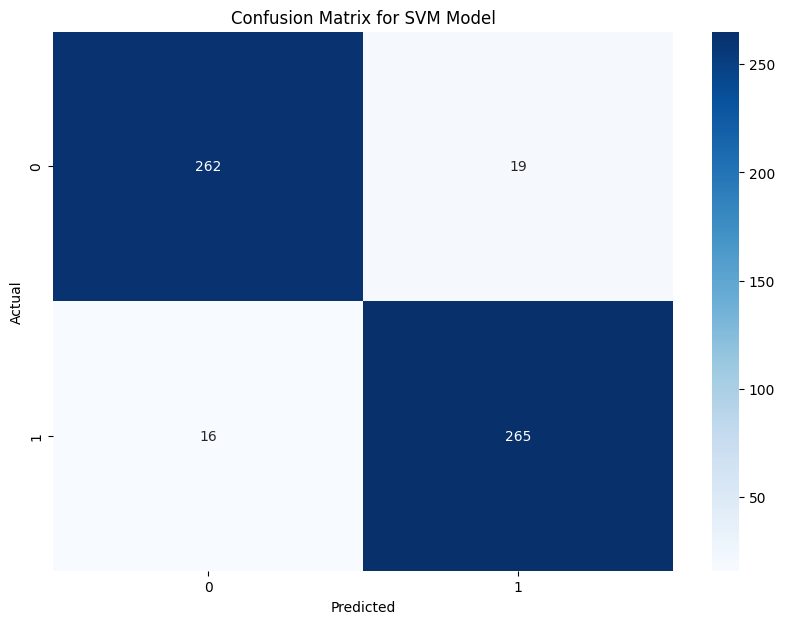

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

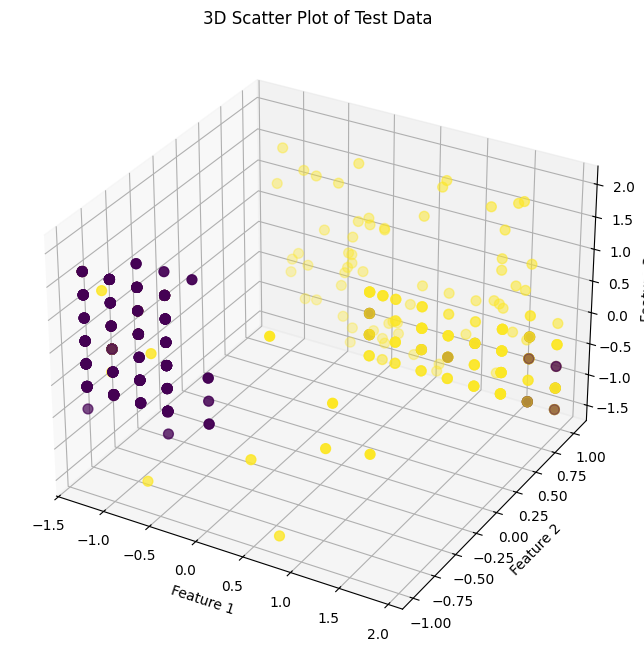

In [12]:
# 3D Plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='viridis', marker='o', s=50)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter Plot of Test Data')
plt.show()

In [13]:
# 3D Plotting using Plotly
import plotly.express as px
fig = px.scatter_3d(
    x=X_test[:, 0], 
    y=X_test[:, 1], 
    z=X_test[:, 2], 
    color=y_test, 
    labels={'x': 'Feature 1', 'y': 'Feature 2', 'z': 'Feature 3'},
    title='3D Scatter Plot of Test Data'
)
fig.update_traces(marker=dict(size=5))
fig.show()